# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [18]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import load_iris
from sklearn import datasets



import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [19]:

iris_data = load_iris()


In [20]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names
def create_df():
    df_iris = pd.DataFrame(iris_data.data, columns= iris_data.feature_names)
    df_iris['target'] = iris_data.target
    df_iris.columns = df_iris.columns.str.replace(" (cm)", "", regex=False)
    df_iris['class'] = df_iris['target'].replace({0:"setosa" , 1:"versicolor" , 2:'virginica'})
    df_iris.head()
    return df_iris   
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
138,6.0,3.0,4.8,1.8,2,virginica
143,6.8,3.2,5.9,2.3,2,virginica
108,6.7,2.5,5.8,1.8,2,virginica
142,5.8,2.7,5.1,1.9,2,virginica
93,5.0,2.3,3.3,1.0,1,versicolor
60,5.0,2.0,3.5,1.0,1,versicolor
109,7.2,3.6,6.1,2.5,2,virginica
123,6.3,2.7,4.9,1.8,2,virginica
97,6.2,2.9,4.3,1.3,1,versicolor
80,5.5,2.4,3.8,1.1,1,versicolor


In [17]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [23]:
#From our data we will only get variable columns as np.array
x = 0
# YOUR CODE HERE
x=df_iris.drop(['target','class'], axis=1)
x.sample(5)

,sepal length,sepal width,petal length,petal width
16,5.4,3.9,1.3,0.4
5,5.4,3.9,1.7,0.4
87,6.3,2.3,4.4,1.3
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6


In [22]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [29]:
mergings = 0 
# YOUR CODE HERE
mergings= linkage(x, method='complete')
mergings.shape

(149, 4)

In [30]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

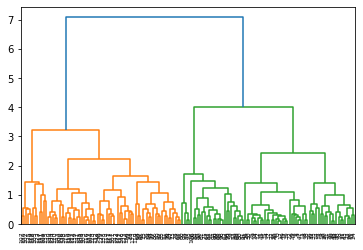

<Figure size 1440x720 with 0 Axes>

In [43]:
dn = 0
# YOUR CODE HERE
dn=dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)
plt.show()

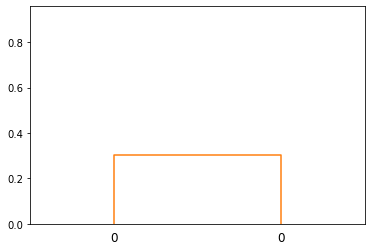

In [46]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [54]:
from sklearn.cluster import KMeans

df = pd.read_csv('./datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./datasets/ch1ex2.csv')
new_points = new_df.values



,0,1
0,0.065446,-0.768664
1,-1.529015,-0.429531
2,1.709934,0.698853
3,1.167791,1.012626
4,-1.801101,-0.318613


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [57]:
model = 0
# YOUR CODE HERE
model=KMeans(n_clusters=3)


In [58]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [59]:
# YOUR CODE HERE
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [61]:
# YOUR CODE HERE
labels=model.predict(points)
print (labels)

[0 2 1 1 2 2 1 0 2 2 1 0 2 1 2 0 1 1 0 1 2 0 2 0 0 2 0 0 0 2 1 1 1 2 0 2 0
 0 2 0 0 1 2 2 2 0 0 1 0 1 1 1 0 0 0 2 0 0 2 1 2 0 0 1 1 2 1 2 2 0 1 2 1 0
 1 2 0 0 0 1 0 2 1 2 2 2 2 0 0 1 2 1 2 0 0 0 1 2 2 1 2 0 2 1 0 1 1 1 2 2 0
 2 1 2 2 2 0 2 1 1 0 0 0 0 0 2 1 0 2 2 1 1 2 0 2 0 1 2 1 0 1 1 0 1 1 0 1 2
 0 0 0 1 1 2 1 2 0 0 1 2 1 1 1 2 0 0 2 1 1 0 0 1 0 0 2 0 1 1 1 0 0 1 0 1 1
 0 2 1 0 0 0 0 2 1 0 2 2 2 0 2 0 0 2 1 1 0 1 0 0 2 2 0 1 2 1 0 1 2 0 2 2 2
 2 1 1 1 0 0 2 0 1 2 0 0 2 0 1 1 1 1 1 2 0 0 1 1 0 2 1 2 2 0 0 2 2 2 0 1 0
 2 0 1 1 1 1 1 0 0 2 0 0 2 1 1 2 0 1 1 2 2 0 0 0 2 2 0 1 2 2 1 0 0 0 2 0 0
 0 2 2 2]


In [62]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [67]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    for label, point in zip(labels,points):
        if label == 0:
            data_0.append(point)
        elif label == 1:
            data_1.append(point)
        elif label == 2:
            data_2.append(point)
    
    
    
    return np.array(data_0), np.array(data_1), np.array(data_2)


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(111, 2)
(94, 2)
(95, 2)


In [68]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

Text(0.5, 1.0, 'KMeans Method')

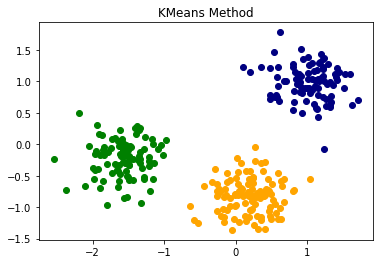

In [86]:
# plotting the data 

# YOUR CODE HERE
plt.scatter(data_0[:,0], data_0[:, 1], color='orange' )
plt.scatter(data_1[:,0], data_1[:,1], color='navy')
plt.scatter(data_2[:,0], data_2[:,1], color='green')
plt.title('KMeans Method')

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [79]:

# YOUR CODE HERE
new_labels = model.predict(new_points)
new_labels

array([1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0,
       2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2])

In [80]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [88]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

# YOUR CODE HERE
new_0, new_1, new_2 = separate_labels(new_labels, new_points)
abs(new_0.shape[0])
abs(new_1.shape[0])
abs(new_2.shape[0])


34

In [89]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

Text(0.5, 1.0, 'KMeans Method')

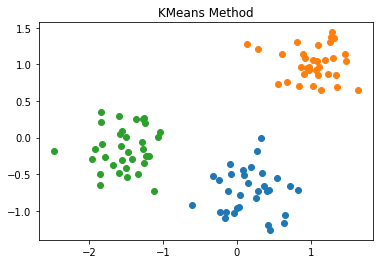

In [91]:
#plot the new labels


# YOUR CODE HERE


plt.scatter(new_0[:,0],new_0[:,1])
plt.scatter(new_1[:,0],new_1[:,1])
plt.scatter(new_2[:,0],new_2[:,1])
plt.title('KMeans Method')

Text(0.5, 1.0, 'KMeans Method')

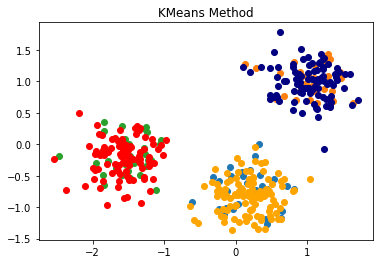

In [93]:
#plot all the points together

# YOUR CODE HERE

plt.scatter(new_0[:,0],new_0[:,1])
plt.scatter(new_1[:,0],new_1[:,1])
plt.scatter(new_2[:,0],new_2[:,1])


plt.scatter(data_0[:,0], data_0[:, 1], color='orange' )
plt.scatter(data_1[:,0], data_1[:,1], color='navy')
plt.scatter(data_2[:,0], data_2[:,1], color='red')
plt.title('KMeans Method')